In [1]:
from utilidades import *
import warnings
warnings.filterwarnings('ignore')

# Spectral Clustering

O algoritmo de clusterização Spectral Clustering é uma técnica avançada de aprendizado de máquina não supervisionado que utiliza conceitos da teoria dos grafos e da análise espectral para agrupar os dados em clusters. Ele é especialmente útil quando os dados não podem ser facilmente separados por fronteiras lineares, pois permite capturar estruturas complexas e não lineares nos dados.

Descrição passo a passo de como o algoritmo de clusterização Spectral Clustering funciona:

**1. Construção do Grafo de Similaridade**: Primeiro, se cria um grafo onde os nós representam os dados que se deseja agrupar. A similaridade entre os pontos é usada para conectar esses nós com arestas. Quanto mais semelhantes forem dois pontos, mais forte é a aresta que os conecta.

**2. Matriz Laplaciana**: Com base no grafo de similaridade, é criada a matriz Laplaciana. Essa matriz resume a estrutura do grafo, representando a conectividade entre nós.

**3. Decomposição Espectral**: Agora, se calcula os autovetores e autovalores da matriz Laplaciana. A decomposição espectral envolve dividir a matriz em suas partes constituintes. 

**4. Redução de Dimensionalidade**: Depois de obter os autovetores, o próximo passo é reduzir a dimensionalidade dos dados. Escolhe-se os autovetores associados aos menores autovalores, que capturam as variações de baixa frequência nos dados. Esses autovetores transformam os dados em um espaço de dimensionalidade reduzida.

**5. Clusterização**: Por fim, a clusterização é realizada nos dados reduzidos. Algoritmos tradicionais de clusterização, como K-means, podem ser aplicados nessa nova representação dos dados para agrupá-los em clusters.

O Spectral Clustering é poderoso porque pode lidar com dados não lineares e capturar estruturas complexas em conjuntos de dados. No entanto, ele também requer o ajuste de parâmetros importantes, como o número de clusters e a escolha da função de similaridade ou distância, que podem afetar significativamente os resultados obtidos.


# Data

In [2]:
X_iris, y_iris, iris_target_names = get_iris_data()
X_wine, y_wine, wine_target_names = get_wine_data()
X_syn_ctrl, y_syn_ctrl, syn_ctrl_target_names = get_synthetic_control_data()

<h1>Redução de dimensionalidade</h2>

In [3]:
from sklearn.manifold import TSNE

X_syn_ctrl_2d = TSNE().fit_transform(X_syn_ctrl)
X_wine_2d = TSNE().fit_transform(X_wine)
X_iris_2d = TSNE().fit_transform(X_iris)

# Clusterização

In [6]:
from sklearn.cluster import SpectralClustering

sc_labels_syn_ctrl = SpectralClustering(n_clusters=6, eigen_solver="arpack", affinity="nearest_neighbors", n_neighbors=5).fit_predict(X_syn_ctrl)
sc_labels_wine = SpectralClustering(n_clusters=3, eigen_solver="arpack", affinity="nearest_neighbors", n_neighbors=10).fit_predict(X_wine)
sc_labels_iris = SpectralClustering(n_clusters=3, eigen_solver="arpack", affinity="nearest_neighbors", n_neighbors=10).fit_predict(X_iris)

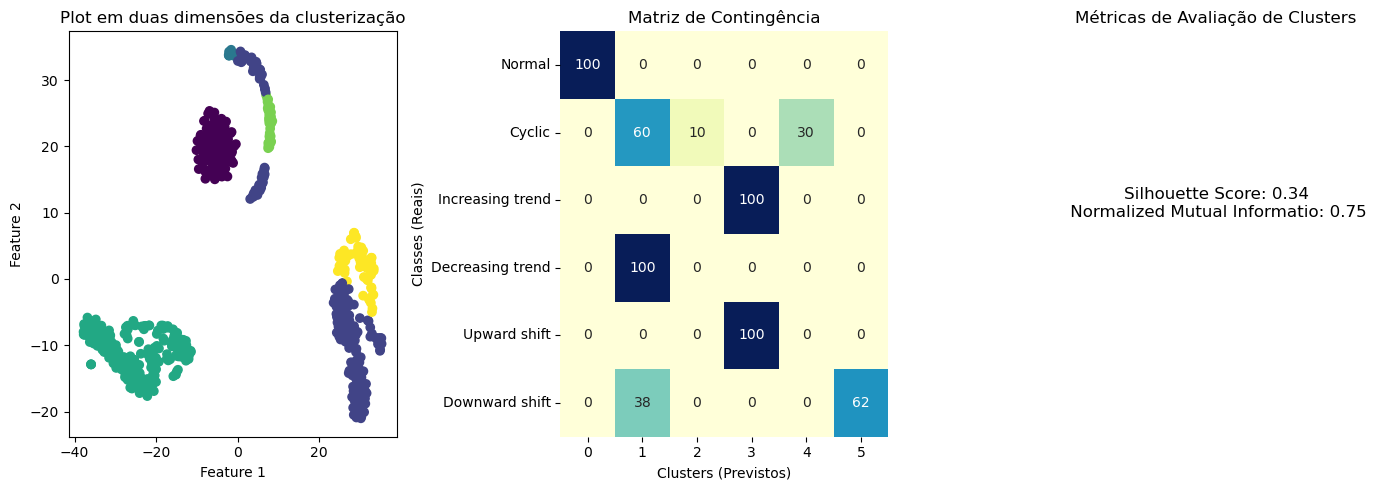

In [8]:
# Synthetic Control

plot_cluster_evaluation(X_syn_ctrl_2d, y_syn_ctrl, sc_labels_syn_ctrl, syn_ctrl_target_names)

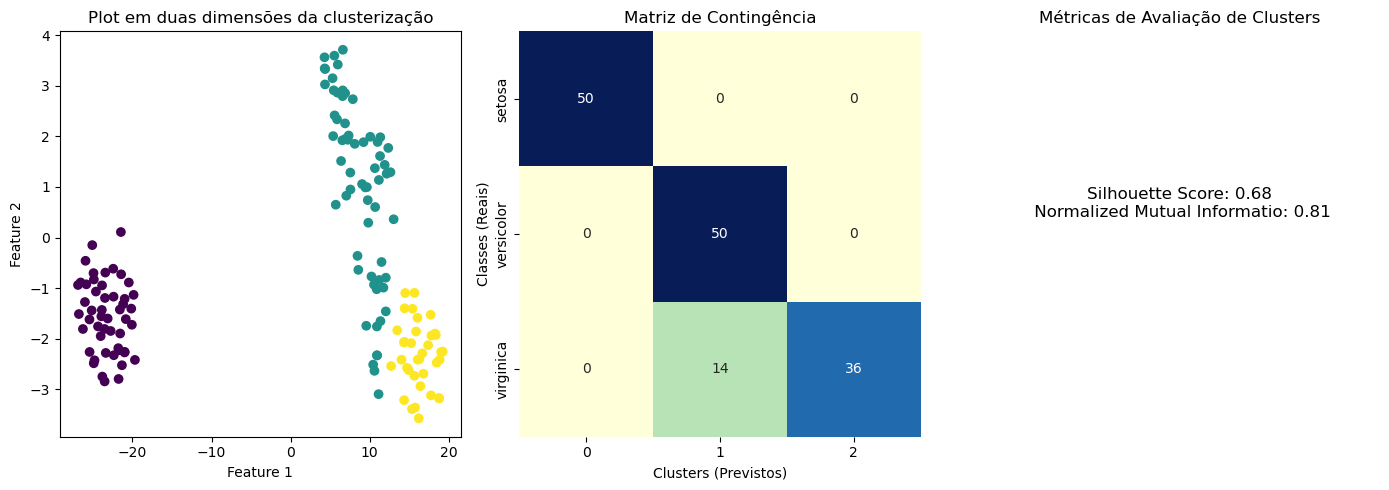

In [10]:
# Iris

plot_cluster_evaluation(X_iris_2d, y_iris, sc_labels_iris, iris_target_names)

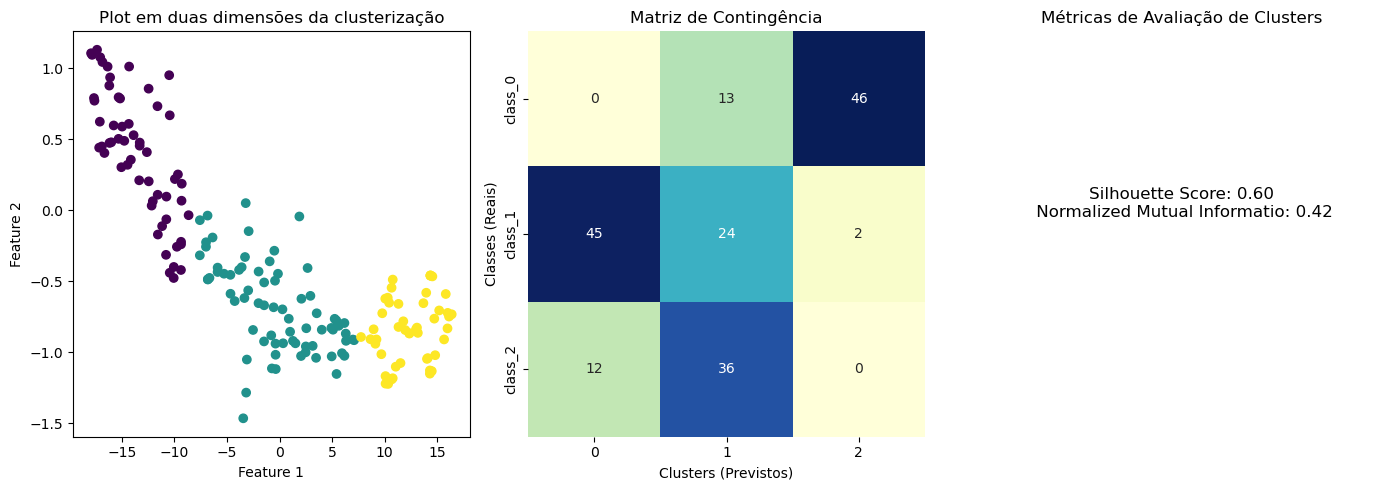

In [9]:
# Wine

plot_cluster_evaluation(X_wine_2d, y_wine, sc_labels_wine, wine_target_names)